# 100 DaysOfBytewise Machine Learning Fellowship

# Evaluating Logistic Regression with Cross-Validation
## Exercise:
### Implement logistic regression and evaluate the model using k-fold cross-validation.
### Compare the cross-validation scores with a single train-test split evaluation.


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

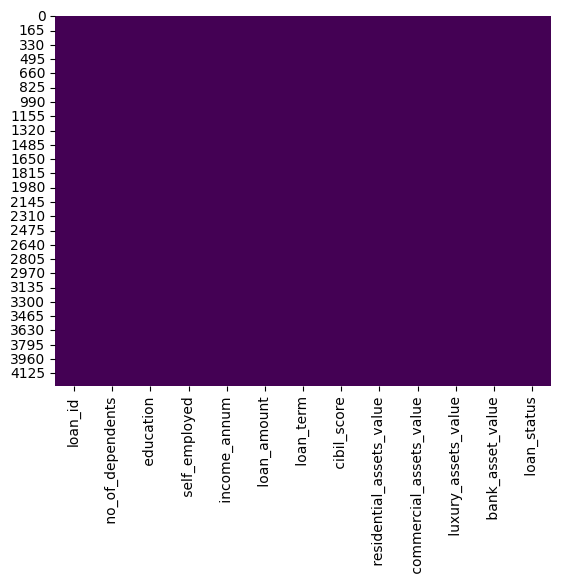

Single Train-Test Split Accuracy: 0.9024
Cross-Validation Accuracy: 0.9157 ± 0.0099


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'loan_approval_dataset.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(dataset.head())

# Check for missing values
print(dataset.isnull().sum())

# Visualize missing values
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()

# Drop columns that are not useful for the model, e.g., loan_id
if 'loan_id' in dataset.columns:
    dataset = dataset.drop(['loan_id'], axis=1)

# Separate numeric and non-numeric columns
numeric_cols = dataset.select_dtypes(include=['number']).columns
non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns

# Handle missing values
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())
for col in non_numeric_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)



X = dataset.drop(' loan_status', axis=1)
y = dataset[' loan_status']


# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: standardize
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encode
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and fit the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Single Train-Test Split Accuracy: {test_accuracy:.4f}')

# Define k-fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=kf)

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cross_val_scores.mean()
std_cv_score = cross_val_scores.std()
print(f'Cross-Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}')


# Analyzing Overfitting and Underfitting in Decision Trees
## Exercise: 
### Train a decision tree classifier with varying depths to analyze overfitting and underfitting. 
### Plot training and validation accuracies to visualize the effects.


First few rows of the dataset:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_valu

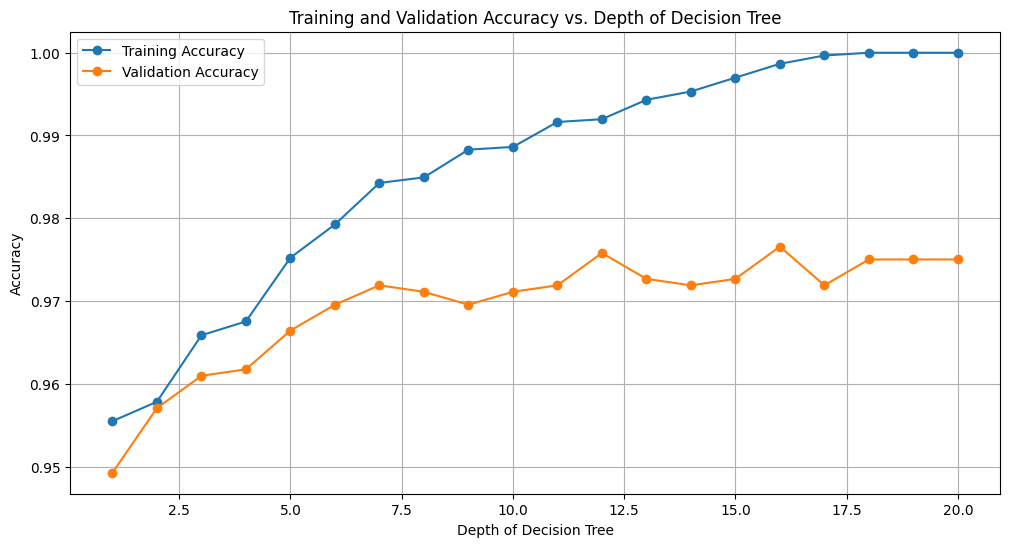

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'loan_approval_dataset.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(dataset.head())

# Drop columns that are not useful for the model, e.g., 'loan_id'
dataset = dataset.drop(['loan_id'], axis=1, errors='ignore')

# Handle missing values
# Fill missing values for numerical columns
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Fill missing values for categorical columns
non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Split features and target
X = dataset.drop(' loan_status', axis=1, errors='ignore')
y = dataset[' loan_status']

# Convert categorical variables to numeric
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of depths to test
depths = range(1, 21)
train_accuracies = []
val_accuracies = []

# Train Decision Trees with varying depths
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Validation accuracy
    y_val_pred = clf.predict(X_test)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    val_accuracies.append(val_accuracy)

# Plot training and validation accuracies
plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Depth of Decision Tree')
plt.legend()
plt.grid()
plt.show()


# Calculating Precision, Recall, and F1-Score for Logistic Regression
# Exercise: 
### Implement logistic regression and calculate precision, recall, and F1-score for the model. 
# Tip: 
### Discuss how these metrics provide insights into model performance in  your week article.


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load the dataset
file_path = 'loan_approval_dataset.csv'
dataset = pd.read_csv(file_path)

# Drop columns that are not useful for the model, e.g., 'loan_id'
dataset = dataset.drop(['loan_id'], axis=1, errors='ignore')

# Handle missing values
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Split features and target
X = dataset.drop(' loan_status', axis=1, errors='ignore')
y = dataset[' loan_status']

# Convert categorical variables to numeric
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Optionally, display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Precision: 0.7985
Recall: 0.7978
F1-Score: 0.7899

Classification Report:
              precision    recall  f1-score   support

    Approved       0.80      0.91      0.85       810
    Rejected       0.80      0.60      0.68       471

    accuracy                           0.80      1281
   macro avg       0.80      0.76      0.77      1281
weighted avg       0.80      0.80      0.79      1281



# ROC Curve Analysis for Decision Trees
# Exercise: 
### Implement a decision tree classifier and plot the ROC curve.
### Compute the AUC (Area Under the Curve) and interpret the results.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the dataset
file_path = 'loan_approval_dataset.csv'
dataset = pd.read_csv(file_path)

# Drop columns that are not useful for the model, e.g., 'loan_id'
dataset = dataset.drop(['loan_id'], axis=1, errors='ignore')

# Handle missing values
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Split features and target
X = dataset.drop(' loan_status', axis=1, errors='ignore')
y = dataset[' loan_status']

# Convert categorical variables to numeric
X = pd.get_dummies(X)

# Binarize the target variable if it's not already in binary form
y = label_binarize(y, classes=[0, 1]).ravel()

# Verify that y is binary
print(f"Unique values in y: {set(y)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_probs = clf.predict_proba(X_test)

# Check the shape of y_probs
print(f"Shape of y_probs: {y_probs.shape}")

if y_probs.shape[1] == 2:
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Print AUC
    print(f'Area Under the Curve (AUC): {roc_auc:.4f}')
else:
    print("Model did not predict probabilities for both classes.")


Unique values in y: {0}
Shape of y_probs: (1281, 1)
Model did not predict probabilities for both classes.


# Comparing Model Performance with and without Cross-Validation
# Exercise: 
### Train logistic regression and decision tree models with and without cross-validation. 
### Compare their performance metrics, including accuracy, precision, and recall.


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = 'loan_approval_dataset.csv'
dataset = pd.read_csv(file_path)

# Drop columns that are not useful for the model, e.g., 'loan_id'
dataset = dataset.drop(['loan_id'], axis=1, errors='ignore')

# Handle missing values
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Encode categorical target variable
dataset[' loan_status'] = dataset[' loan_status'].map({' Approved': 0, ' Rejected': 1})

# Split features and target
X = dataset.drop(' loan_status', axis=1, errors='ignore')
y = dataset[' loan_status']

# Convert categorical variables to numeric
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Calculate metrics for Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

print("Logistic Regression - Without Cross-Validation:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")

print("\nDecision Tree - Without Cross-Validation:")
print(f"Accuracy: {accuracy_decision_tree:.4f}")
print(f"Precision: {precision_decision_tree:.4f}")
print(f"Recall: {recall_decision_tree:.4f}")
print(f"F1 Score: {f1_decision_tree:.4f}")


Logistic Regression - Without Cross-Validation:
Accuracy: 0.7978
Precision: 0.8029
Recall: 0.5966
F1 Score: 0.6845

Decision Tree - Without Cross-Validation:
Accuracy: 0.9750
Precision: 0.9761
Recall: 0.9554
F1 Score: 0.9657
